<a href="https://colab.research.google.com/github/snigdha2606/Spoon-Knife/blob/main/Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FEATURE EXTRACTION

DATASET: Multi-View Stereo (MVS) datasets (temple)

This code performs the following tasks:

1.Load two images and convert them to grayscale using OpenCV.

2.Detect keypoints and compute their descriptors for each image using SIFT (Scale-Invariant Feature Transform) feature detector.

3.Match the keypoints using the brute-force matcher (BFMatcher) with the L2 (Euclidean) distance as the distance measure.

4.Convert the keypoints into numpy arrays and use RANSAC (Random Sample Consensus) algorithm to find the best homography between the two images.

5.Randomly select 4 matched points and calculate the homography using these 4 points.

6.Find the inliers (keypoints that lie on the same plane in both images) using the homography and a threshold distance.

7.Repeat the above steps for a specified number of iterations (30 in this case) and choose the homography that produces the most inliers.

8.Remove the outliers using the best homography and draw the matches between the two images.

9.Show the output image using cv2_imshow().

Overall, this code uses SIFT feature detection and RANSAC algorithm to find the point correspondences between two images and remove any outliers to get a better matching result.

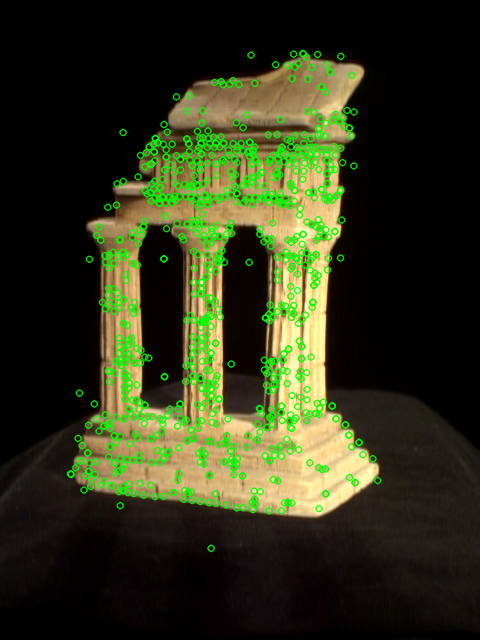

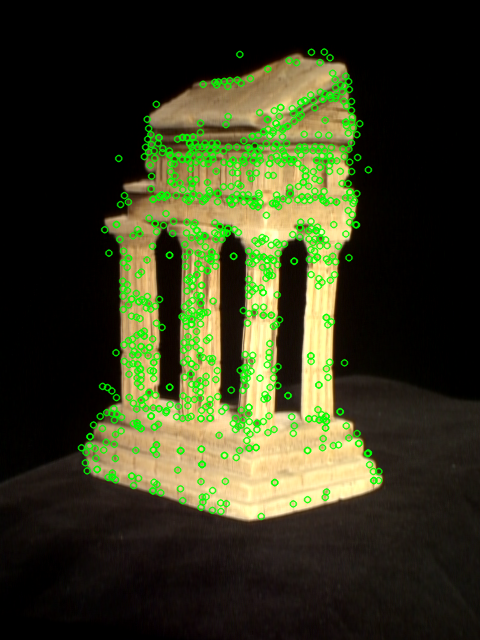

In [1]:
import cv2
from google.colab.patches import cv2_imshow

# Load the two images
img1 = cv2.imread('/content/temple_1.png')
img2 = cv2.imread('/content/temple_2.png')

# Convert the images to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Create a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# Detect keypoints and compute descriptors for each image
kp1, desc1 = sift.detectAndCompute(gray1, None)
kp2, desc2 = sift.detectAndCompute(gray2, None)

# Draw the keypoints on the images
img1_kp = cv2.drawKeypoints(img1, kp1, None, color=(0, 255, 0))
img2_kp = cv2.drawKeypoints(img2, kp2, None, color=(0, 255, 0))

# Show the images with keypoints
cv2_imshow(img1_kp)
cv2_imshow(img2_kp)
cv2.waitKey(0)
cv2.destroyAllWindows()

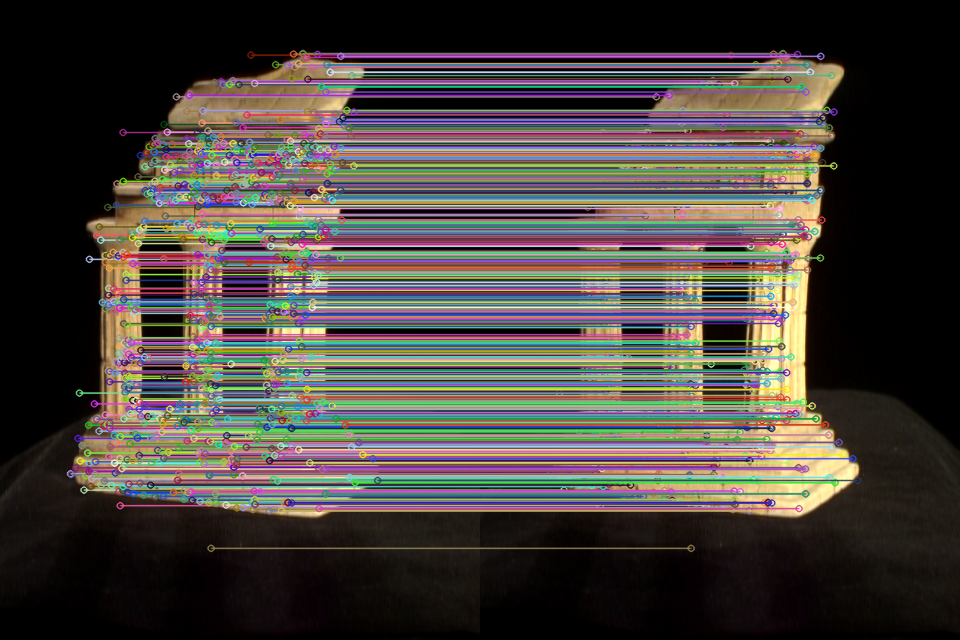

In [2]:
import cv2
from google.colab.patches import cv2_imshow

# Load the two images
img1 = cv2.imread('/content/temple_1.png')
img2 = cv2.imread('/content/temple_1.png')

# Convert the images to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Create a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# Detect keypoints and compute descriptors for each image
kp1, desc1 = sift.detectAndCompute(gray1, None)
kp2, desc2 = sift.detectAndCompute(gray2, None)

#Create a BFMatcher object to match the descriptors
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Match the descriptors of the two images
matches = bf.match(desc1, desc2)

# Sort the matches by their distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw the matches
result = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Show the result
cv2_imshow(result)
# cv2_imshow(img1)
# cv2_imshow(img2)
cv2.waitKey(0)
cv2.destroyAllWindows()


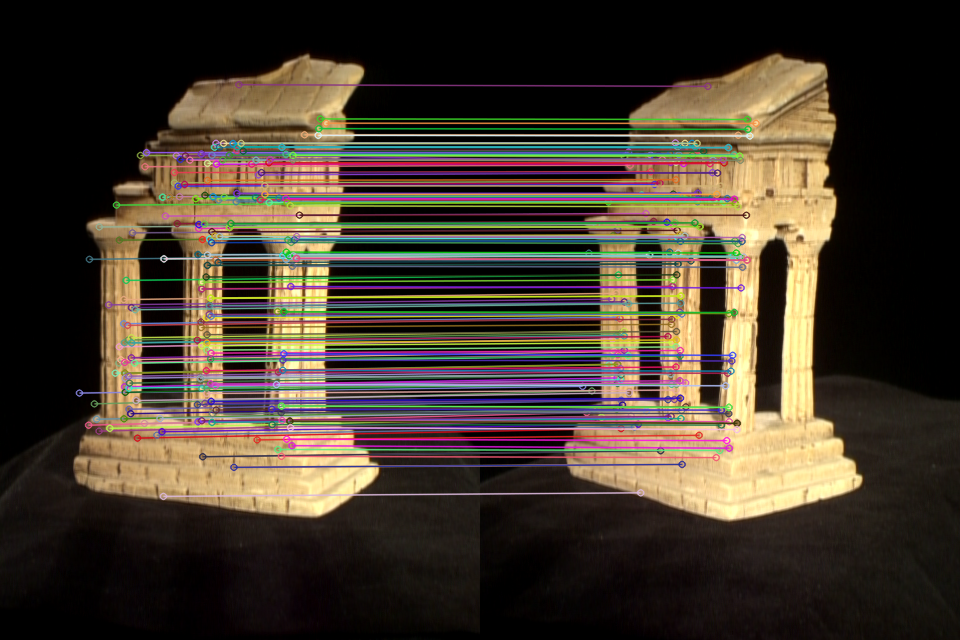

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the two images and their keypoints and descriptors
img1 = cv2.imread('/content/temple_1.png')
img2 = cv2.imread('/content/temple_2.png')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
kp1, desc1 = sift.detectAndCompute(gray1, None)
kp2, desc2 = sift.detectAndCompute(gray2, None)

# Match the keypoints using BFMatcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(desc1, desc2)

# Convert keypoints to numpy arrays
pts1 = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
pts2 = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

# Run RANSAC to find the best homography
num_iterations = 30
max_inliers = 0
best_homography = None

for i in range(num_iterations):
    # Randomly select 4 matched points
    random_indices = np.random.randint(0, len(matches), size=4)
    src_points = pts1[random_indices]
    dst_points = pts2[random_indices]

    # Calculate the homography using the 4 points
    homography, _ = cv2.findHomography(src_points, dst_points, cv2.RANSAC, 5.0)

    # Find the inliers using the homography
    src_points_transformed = cv2.perspectiveTransform(pts1, homography)
    distances = np.sqrt(np.sum((pts2 - src_points_transformed)**2, axis=2))
    inliers = distances < 10

    # Log the number of inliers
    num_inliers = np.sum(inliers)

    # Update the best homography if this iteration produced more inliers
    if num_inliers > max_inliers:
        max_inliers = num_inliers
        best_homography = homography

# Remove outliers using the best homography
src_points_transformed = cv2.perspectiveTransform(pts1, best_homography)
distances = np.sqrt(np.sum((pts2 - src_points_transformed)**2, axis=2))
inliers = distances < 10
matches_filtered = [matches[i] for i in range(len(matches)) if inliers[i]]

# Draw the matches
result = cv2.drawMatches(img1, kp1, img2, kp2, matches_filtered, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Show the result
cv2_imshow(result)
cv2.waitKey(0)
cv2.destroyAllWindows()


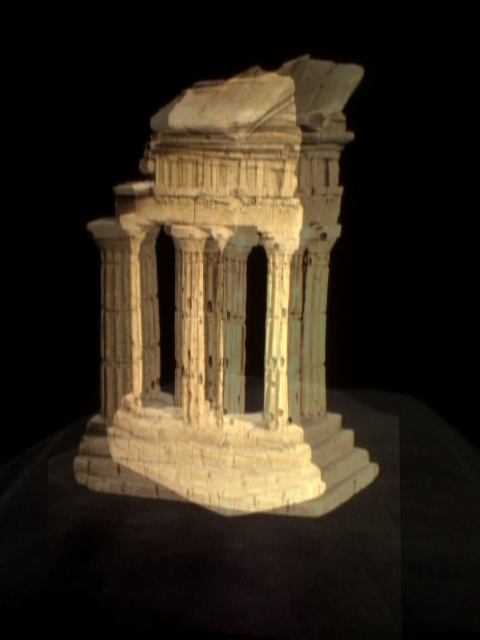

In [4]:
# Run RANSAC to find the best homography
from google.colab.patches import cv2_imshow
num_iterations = 30
max_inliers = 0
best_homography = None

for i in range(num_iterations):
    # Randomly select 4 matched points
    random_indices = np.random.randint(0, len(matches), size=4)
    src_points = pts1[random_indices]
    dst_points = pts2[random_indices]

    # Calculate the homography using the 4 points
    homography, _ = cv2.findHomography(src_points, dst_points, cv2.RANSAC, 5.0)

    # Find the inliers using the homography
    src_points_transformed = cv2.perspectiveTransform(pts1, homography)
    distances = np.sqrt(np.sum((pts2 - src_points_transformed)**2, axis=2))
    inliers = distances < 10

    # Log the number of inliers
    num_inliers = np.sum(inliers)

    # Update the best homography if this iteration produced more inliers
    if num_inliers > max_inliers:
        max_inliers = num_inliers
        best_homography = homography
# Warp the second image using the homography
img2_warped = cv2.warpPerspective(img2, best_homography, (img1.shape[1], img1.shape[0]))

# Stitch the two images together
result = cv2.addWeighted(img1, 0.5, img2_warped, 0.5, 0)

# Display the result image
cv2_imshow(result)
cv2.waitKey(0)
cv2.destroyAllWindows()